# Employees and Pandas


### Import dependencies

In [8]:
import pandas as pd
from config import pw
import sqlalchemy
from sqlalchemy.ext.automap import automap_base

from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine, inspect

### Create engine to connect to database

In [2]:
dbuser = 'postgres'
dbpassword = pw
dbhost = 'localhost'
dbport = '5432'
dbname= 'emp_db'

engine = create_engine(f"postgres://{dbuser}:{dbpassword}@{dbhost}:{dbport}/{dbname}")
Base = automap_base()
Base.metadata.create_all(engine)
Base.prepare(engine, reflect=True)
Base.classes.keys()

['titles', 'employees', 'salaries', 'departments']

### Establish a communication session with the engine

In [3]:
session = Session(bind=engine)
inspector = inspect(engine)

### Establish a communication session with the engine

In [4]:
inspector.get_table_names()

['titles', 'employees', 'salaries', 'departments', 'dept_manager', 'dept_emp']

In [15]:
pd_employees = pd.read_sql_table('employees', engine)
pd_titles = pd.read_sql_table('titles', engine)
pd_salaries = pd.read_sql_table('salaries', engine)
pd_departments = pd.read_sql_table('departments', engine)
pd_dept_manager = pd.read_sql_table('dept_manager', engine)
pd_dept_emp = pd.read_sql_table('dept_emp', engine)


In [23]:
pd_titles.rename(columns = {'title_id':'em_title_id'}, inplace = True) 
pd_titles

In [27]:
pd_employees

,empl,em_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [29]:
pd_employees_merge = pd_employees.merge(pd_titles, how='inner', on='em_title_id')
pd_employees_merge

,empl,em_title_id,birth_date,first_name,last_name,sex,hire_date,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff
...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,Manager


In [31]:
pd_salaries.rename(columns = {'emp_no':'empl'}, inplace = True) 

In [32]:
pd_salaries

,empl,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [33]:
pd_employees_merge2 = pd_employees_merge.merge(pd_salaries, how='inner', on='empl')

In [34]:
pd_employees_merge2

,empl,em_title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,Manager,72446
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,Manager,71148
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,Manager,60026
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,Manager,40000


In [35]:
import numpy as np
import matplotlib.pyplot as plt

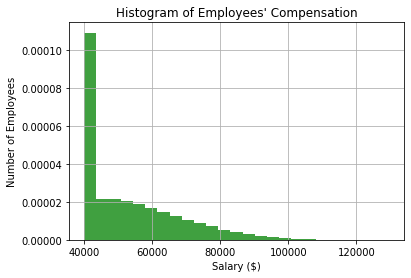

In [42]:
plt.hist(pd_employees_merge2['salary'], 25, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Salary ($)')
plt.ylabel('Number of Employees')
plt.title('Histogram of Employees\' Compensation')
plt.grid(True)
plt.show()

In [53]:
avg_compensation_title = pd_employees_merge2.groupby('title')['salary'].mean()
avg_compensation_title

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

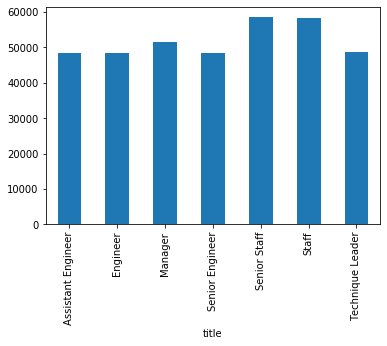

In [54]:
pd_employees_merge2.groupby('title')['salary'].mean().plot(kind='bar')